# P-166- Apple Stock Forecast (Forecasting Model)
### 1) Import Libraries

In [1]:
# pip freeze

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
import statsmodels.api as sm
import warnings              # Supressing warnings
warnings.filterwarnings('ignore')

### 2) Import Dataset

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\project p166\AAPL.csv") 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


+ We have imported the Dataset for Forecasting Model - Apple Stock using Pandas. 
+ This Data Set contains 2011 Rows and 7 Columns
+ Date Range - From 01/03/2012 To 12/30/2019. We Have total 7 year data.

### 3) EDA: Data Pre-Processing

In [4]:
df=df.round(decimals=2, out=None)

+ Stock price in this Data Set has got 6 decimal values. We have tried rounded the decimal values to two - digits for the purpose of projection.

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.49,58.93,58.43,58.75,50.77,75555200
1,2012-01-04,58.57,59.24,58.47,59.06,51.04,65005500
2,2012-01-05,59.28,59.79,58.95,59.72,51.61,67817400
3,2012-01-06,59.97,60.39,59.89,60.34,52.14,79573200
4,2012-01-09,60.79,61.11,60.19,60.25,52.06,98506100


+ We have extracted the first five rows of the dataset and it is useful for quickly testing if the object has the right type of data in it.

In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.53,284.25,280.37,284.00,282.05,24643000
2007,2019-12-24,284.69,284.89,282.92,284.27,282.32,12119700
2008,2019-12-26,284.82,289.98,284.70,289.91,287.92,23280300
2009,2019-12-27,291.12,293.97,288.12,289.80,287.81,36566500
2010,2019-12-30,289.46,292.69,285.22,291.52,289.52,36028600


+ We have extracted the last five rows of the dataset.

In [7]:
df.shape

(2011, 7)

+ This DataSet comprises of 2011 observations and 10 characteristics.

In [8]:
df.index

RangeIndex(start=0, stop=2011, step=1)

+ The index information contains the labels of the rows. Index property returns a Range Index object with the start, stop, and step values.

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

+ Names of Columns in data are shown here. 

In [10]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

+ Data has float and integer values.
+ Date Column is in Object type, so first we convert it into datetime format.

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


+ Shows no. of rows, columns, Data types of each column and also null values

In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.00000,2.011000e+03
mean,126.707509,127.827618,125.580308,126.741273,119.50548,5.949670e+07
std,50.483719,50.926281,50.124898,50.578336,52.43837,4.683856e+07
min,55.420000,57.090000,55.010000,55.790000,48.92000,1.136200e+07
25%,85.880000,86.720000,85.060000,86.200000,75.05500,2.758565e+07
50%,113.050000,114.190000,111.870000,113.050000,105.22000,4.346900e+07
75%,165.190000,167.410000,163.425000,165.245000,160.05000,7.471030e+07
max,291.120000,293.970000,288.120000,291.520000,289.52000,3.765300e+08


+ Descriptive Statistics
+ Here as we can notice median value is less than mean value of each column. Median value is represented by 50%(50th percentile) in index column.

In [15]:
df.isna().sum()  

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

+ No null values in given data set that is data is completely filled.

In [16]:
df[df.duplicated()]   

,Date,Open,High,Low,Close,Adj Close,Volume


+ No duplicate values exist in given dataset

In [17]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557957
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559653
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566333
Volume,-0.557957,-0.554909,-0.563426,-0.559653,-0.566333,1.000000


+ Shows relationship between variables

### 4) Visualization of Data
### Heatmap:

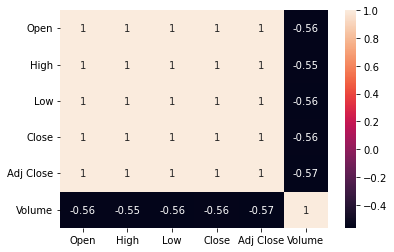

In [18]:
sns.heatmap(df.corr(), annot=True)
plt.show()

+ from this heatmap we can say there is a strong correlation between five columns that is open, high, low, close, adjacent close so we can choose any one from this for prediction. we choose close column to predict stock price.

### Boxplot (or Box-and-Whisker plot):

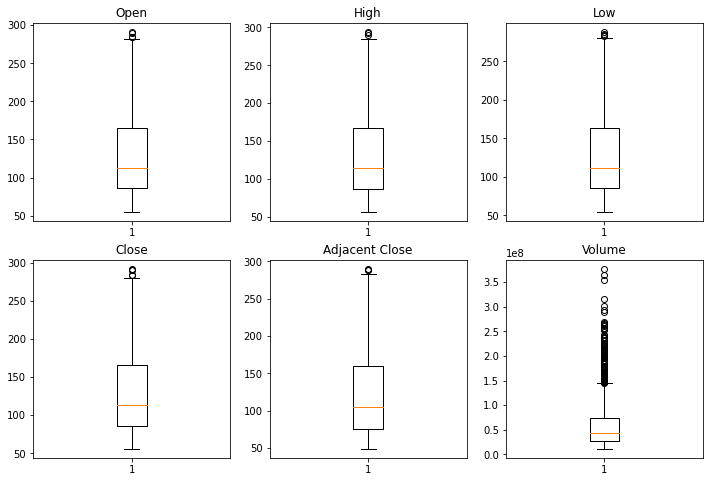

In [19]:
fig, ax = plt.subplots(2,3, figsize = (12,8))
ax[0,0].boxplot(df.Open);ax[0,0].set_title("Open")
ax[0,1].boxplot(df.High);ax[0,1].set_title("High")
ax[0,2].boxplot(df.Low);ax[0,2].set_title("Low")
ax[1,0].boxplot(df.Close);ax[1,0].set_title("Close")
ax[1,1].boxplot(df["Adj Close"]);ax[1,1].set_title("Adjacent Close")
ax[1,2].boxplot(df.Volume);ax[1,2].set_title("Volume")
plt.show()

+ As we Observe that there are minimum number of Outliers in every columns so we can neglect those outlier.
+ There are High no. of Outliers in 'Volume' column

In [20]:
df.set_index('Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.strftime('%B')
df['day'] = df.index.strftime('%A')
df['quarter'] = df.index.quarter

### Yearwise Data distribution

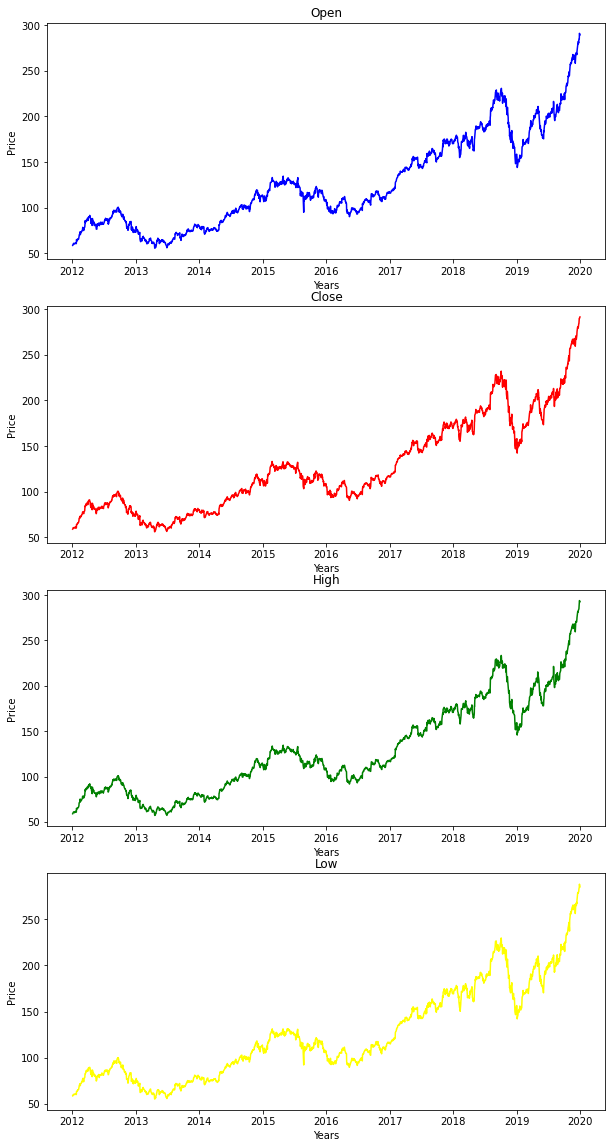

In [21]:
plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
plt.plot(df.index, df['Open'], color = 'blue');plt.title("Open");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,2)
plt.plot(df.index, df['Close'], color = 'red');plt.title("Close");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,3)
plt.plot(df.index, df['High'], color = 'green');plt.title("High");plt.xlabel("Years"); plt.ylabel('Price')
plt.subplot(4,1,4)
plt.plot(df.index, df['Low'], color = 'yellow');plt.title("Low");plt.xlabel("Years"); plt.ylabel('Price')
plt.show()

In [22]:
close_year = df.groupby("year")[["Close"]].sum()
close_year.head()

,Close
year,
2012,20573.26
2013,17014.84
2014,23250.73
2015,30250.08
2016,26360.21


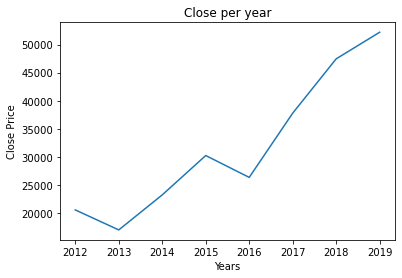

In [23]:
plt.plot(close_year);plt.xlabel("Years");plt.ylabel('Close Price');plt.title("Close per year")
plt.show()

In [24]:
close_month = df.groupby("month")[["Close"]].sum()
close_month.head()

,Close
month,
April,20080.78
August,23633.79
December,22603.49
February,17377.55
January,17696.30


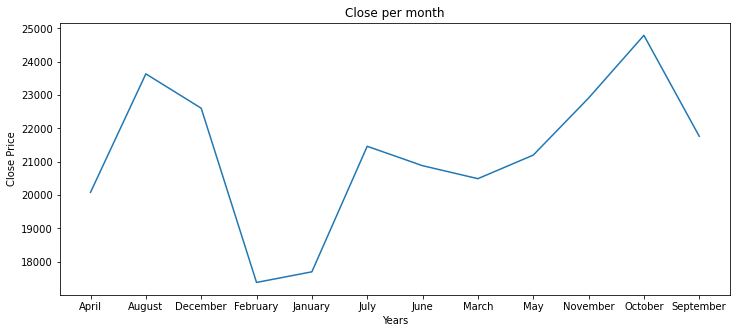

In [25]:
plt.figure(figsize=(12,5))
plt.plot(close_month);plt.xlabel("Years");plt.ylabel('Close Price');plt.title("Close per month")
plt.show()

In [26]:
close_day = df.groupby("day")[["Close"]].sum()
close_day.head()

,Close
day,
Friday,51380.35
Monday,48300.65
Thursday,51212.33
Tuesday,52038.07
Wednesday,51945.30


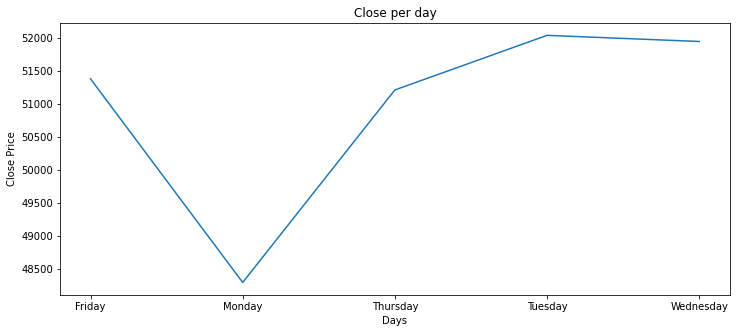

In [27]:
plt.figure(figsize=(12,5))
plt.plot(close_day);plt.xlabel("Days");plt.ylabel('Close Price');plt.title("Close per day")
plt.show()

### Monthly Close Stock Price data distribution

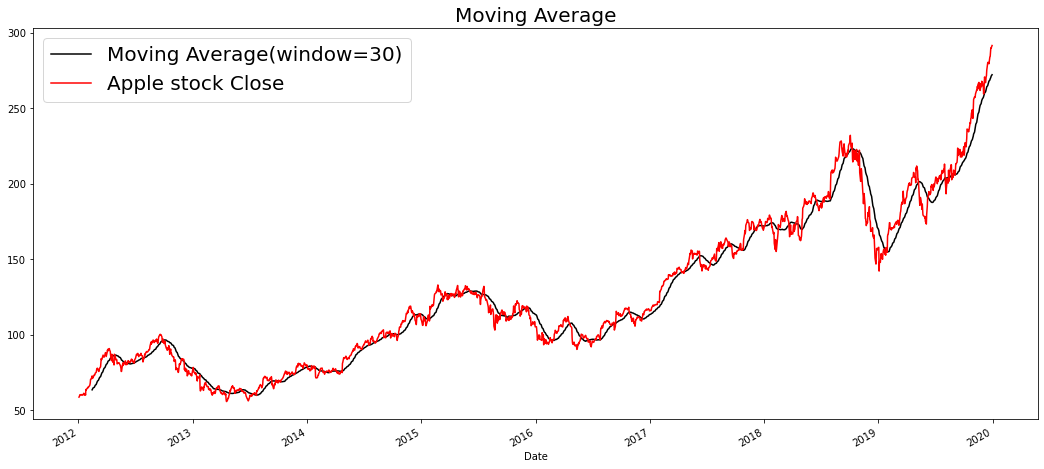

In [28]:
plt.figure(figsize=(18,8))
df['Close'].rolling(window=30).mean().plot(label='Moving Average(window=30)',color='black')
df['Close'].plot(label='Apple stock Close',color='red')
plt.title("Moving Average", fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.show()

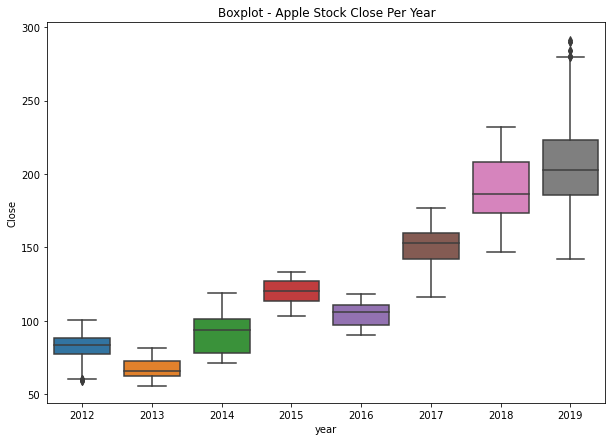

In [29]:
plt.figure(figsize = (10,7))
sns.boxplot(x=df['year'], y = df['Close'])
plt.title('Boxplot - Apple Stock Close Per Year')
plt.style.context('fivethirtyeight')
plt.show()

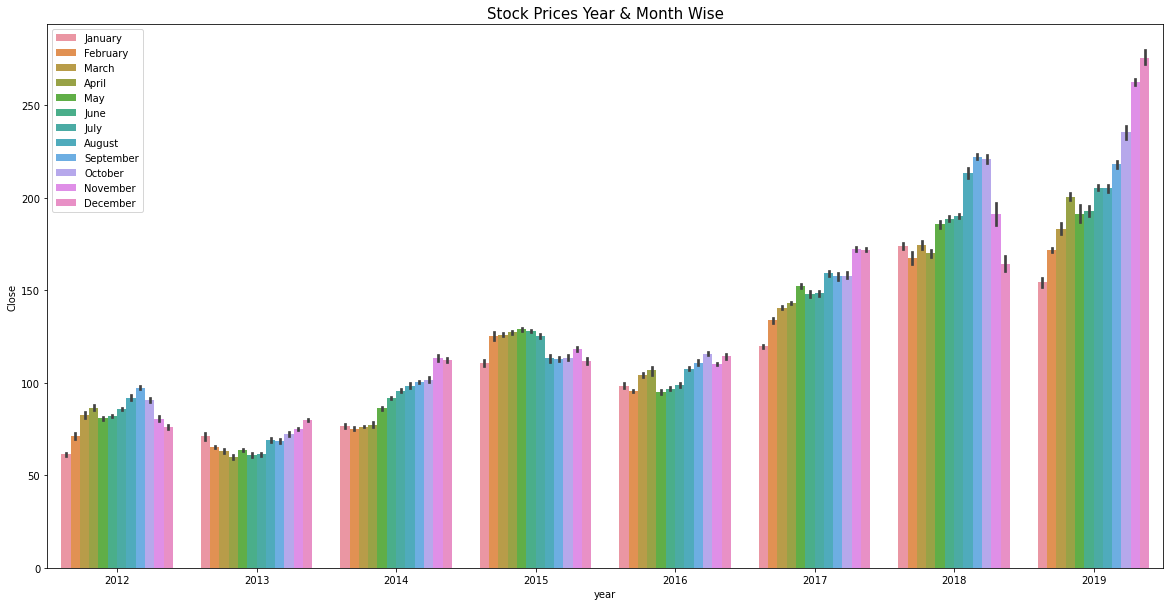

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("Paired", 4)
a = sns.barplot(x=df['year'], y=df["Close"],hue = df['month'],data=df['month'])
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

+ Above figure shows that the Period from July-September seems to push stock price above in comparision to other months. The primary reason for this is as Apple has a product cycle release date during this time.

In [31]:
# Resampling Data to Month by Aggregating using mean
monthly_mean = df['Close'].resample('M').mean()
monthly_df = monthly_mean.to_frame()
monthly_df

,Close
Date,
2012-01-31,61.225500
2012-02-29,71.082000
2012-03-31,82.500909
2012-04-30,86.572500
2012-05-31,80.667273
...,...
2019-08-31,204.957727
2019-09-30,217.995000
2019-10-31,235.286522


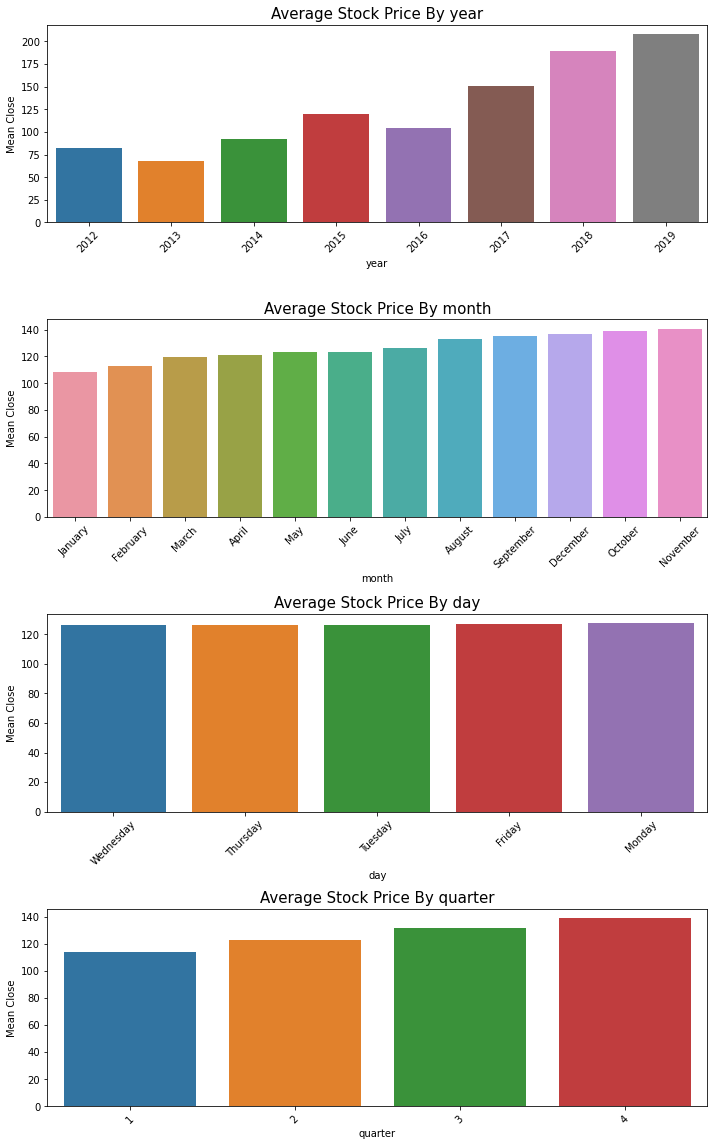

In [32]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = df.drop(['Open','High','Low','Adj Close','Volume'], axis = 1)
group_cols = group_cols.columns

for enum,i in enumerate(group_cols[1:]):
    ax = fig.add_subplot(4,1,enum+1)
    Aggregated = pd.DataFrame(df.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
    sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
    ax.set(xlabel=str(i), ylabel='Mean Close')
    ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
    plt.xticks(rotation=45)
plt.tight_layout(pad=1)

### Model Building
### Decomposition of Time Series

In [33]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd

<Figure size 1440x1152 with 0 Axes>

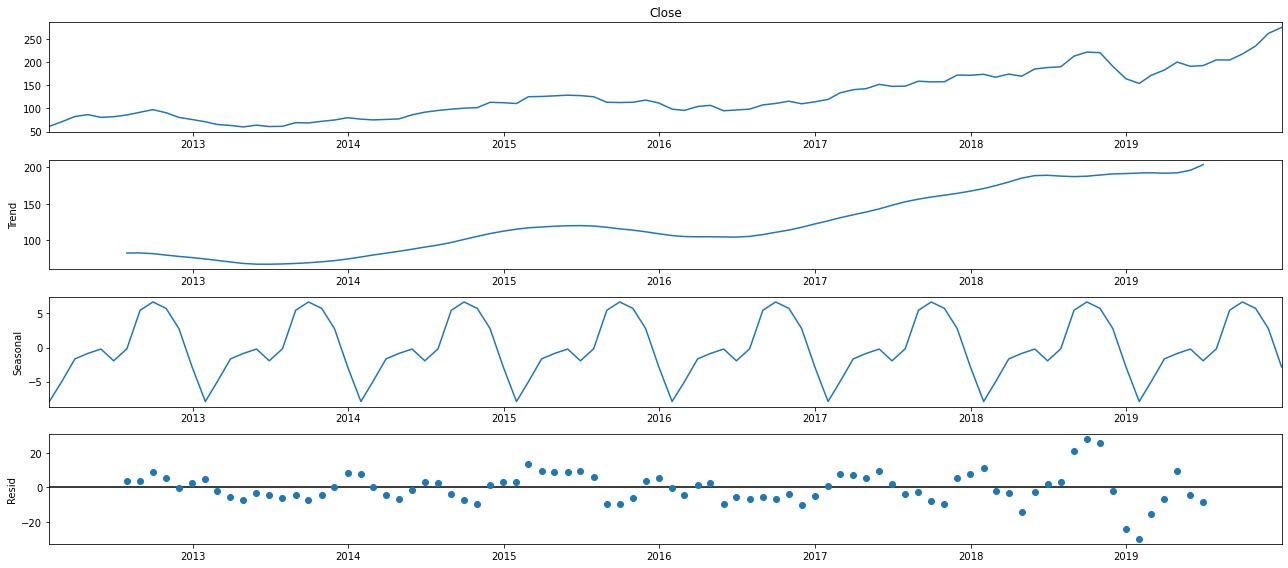

In [34]:
rcParams['figure.figsize']=18,8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_df['Close'],model='additive')
decomposed_series.plot()
plt.show()

+ Trend : Overall an Upward Trend

+ Seasonality :There appears to be seasonality,AAPLE has rallied during the last 3 Months of every year. Oct to Dec period has good sales for Apple Over the Years.
#### We can quite clearly see that the data has all 3, Levels, Trends, Seasonality.

### Plotting Rolling Statistics
+ We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.

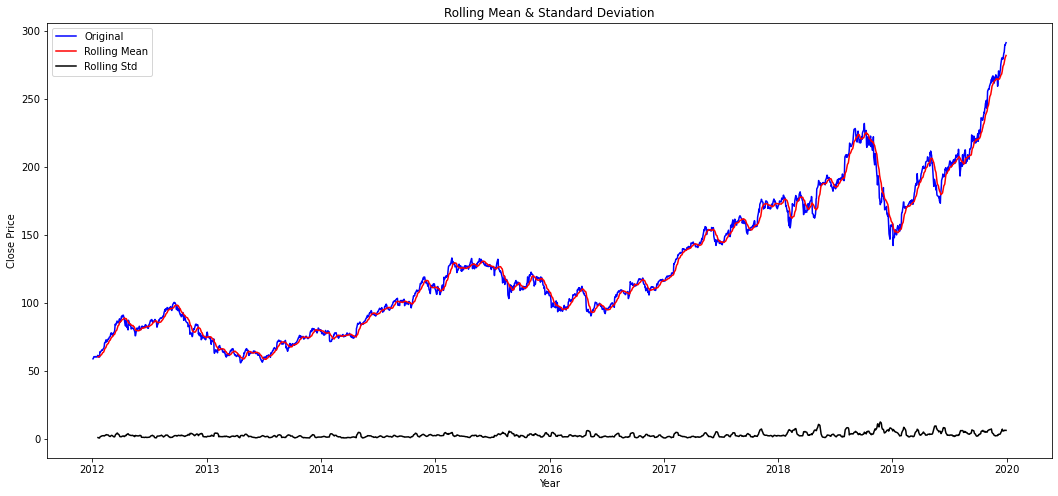

In [35]:
rolmean = df['Close'].rolling(12).mean()
rolstd = df['Close'].rolling(12).std()

#Plot rolling statistics:

orig = plt.plot(df['Close'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.xlabel("Year")
plt.ylabel('Close Price')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

+ We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
+ The time series is hence not stationary

### Test of Stationarity:
+ Time Series is Stationary if we have constant mean, constant variance and No Trend and No Seasonality

+ But in our data set we can see uprising trend and also seasonality is present, So we can say that our data is Non-Stationary.

**ADF(Augmented Dickey-Fuller) Test**

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
def adfuller_test(close):
    result = adfuller(close)
    labels = ['ADF Test Statistic', 'p-value','#Lags Used', 'Number of Observations used']
    for value, label in zip(result, labels):
        print(label+' : ' +str(value))
    if result[1] <= 0.05:
        print("Reject Null Hypothesis. Data is Stationary")
    else:
        print("Accept Null Hypothesis. Data is Non - Stationary")

In [38]:
adfuller_test(df['Close'])

ADF Test Statistic : 1.219347946700241
p-value : 0.9961168706935021
#Lags Used : 9
Number of Observations used : 2001
Accept Null Hypothesis. Data is Non - Stationary


### Detrend

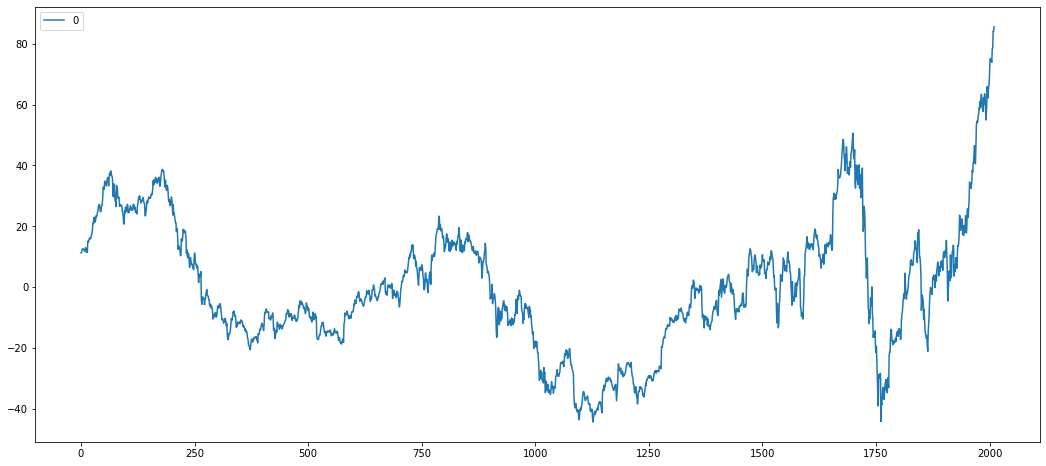

In [39]:
from scipy import signal
detrended = signal.detrend(df.Close)
detrended_df = pd.DataFrame(detrended)
detrended_df.plot()
plt.show()

In [40]:
adfuller_test(detrended_df)

ADF Test Statistic : -0.7538890107192644
p-value : 0.8322931564204996
#Lags Used : 9
Number of Observations used : 2001
Accept Null Hypothesis. Data is Non - Stationary


### Differencing

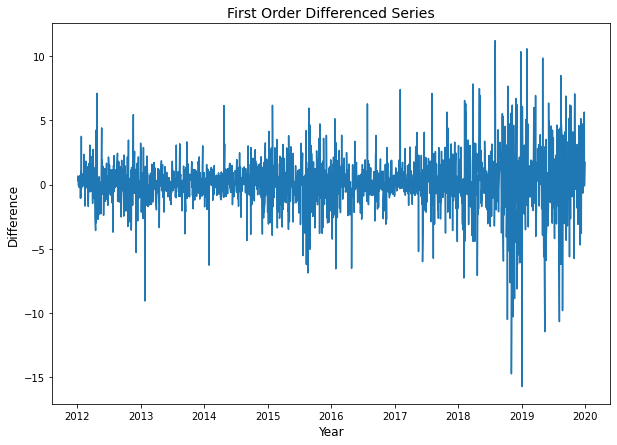

In [41]:
#Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
df['Diff'] = df['Close'].diff()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(df['Diff'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [42]:
adfuller_test(df['Diff'].dropna())

ADF Test Statistic : -13.625538376073823
p-value : 1.7630934279439238e-25
#Lags Used : 8
Number of Observations used : 2001
Reject Null Hypothesis. Data is Stationary


+ **Our Series is now stationary**

### ACF plots and PACF plots

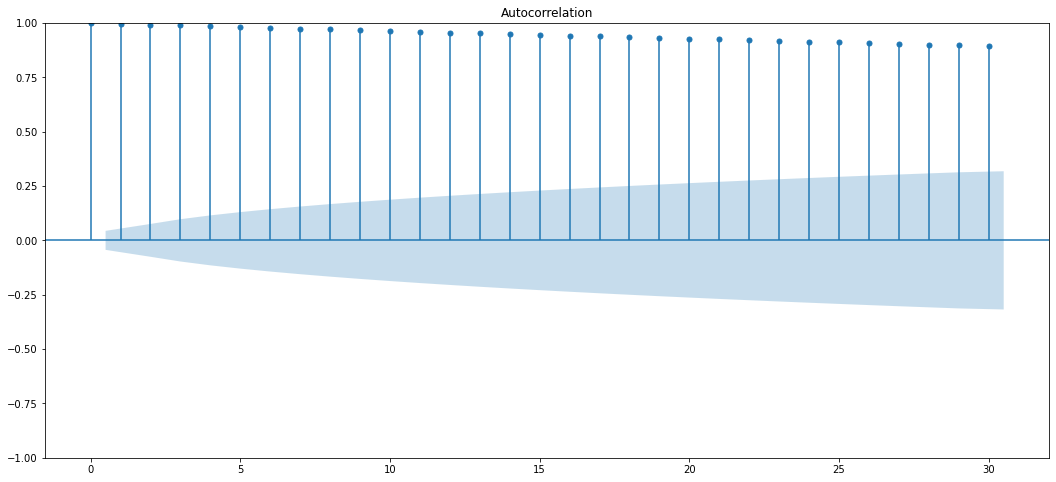

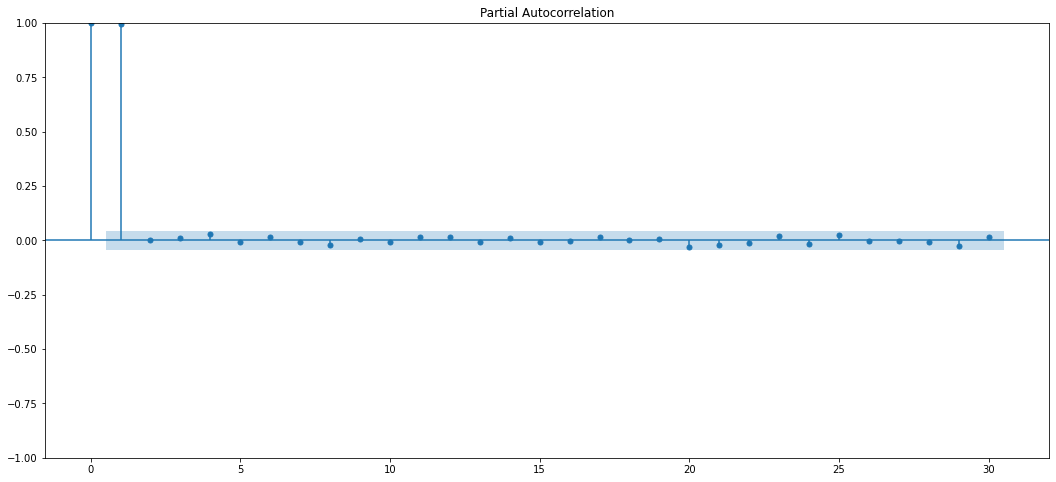

In [43]:
# Original Data
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf((df['Close'].dropna()),lags=30)
tsa_plots.plot_pacf((df['Close'].dropna()),lags=30)
plt.show()

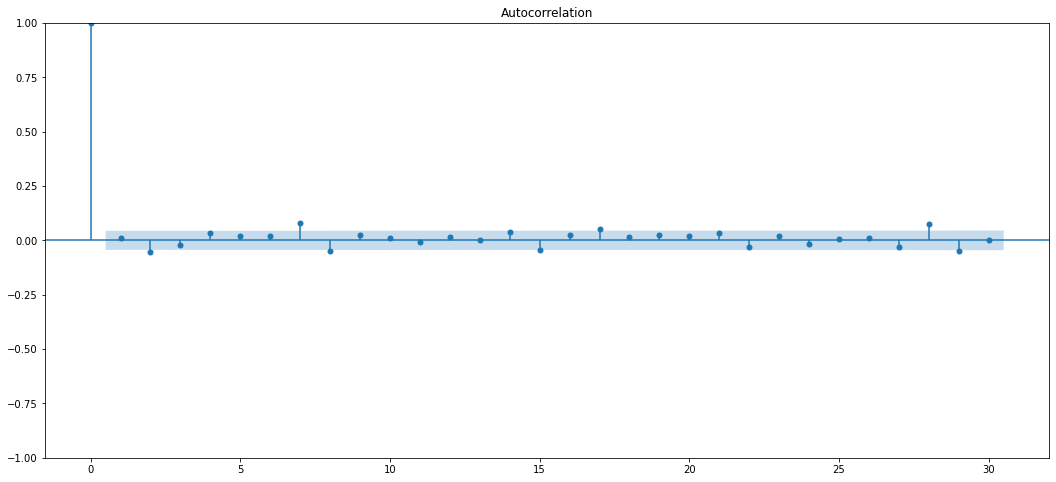

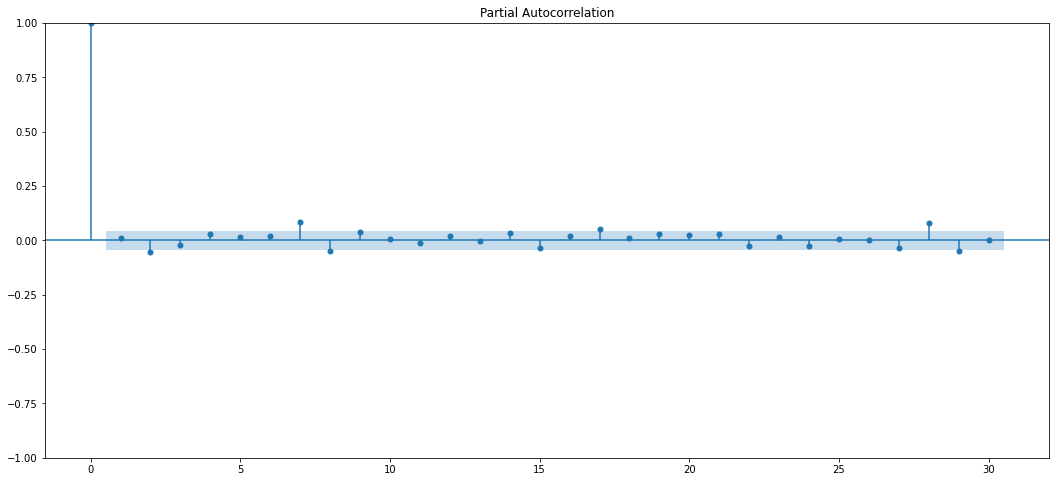

In [44]:
# After Differencing
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf((df['Diff'].dropna()),lags=30)
tsa_plots.plot_pacf((df['Diff'].dropna()),lags=30)
plt.show()

#### We can also use the pmdarima package to get the number of differencing. (Alternate method)

In [45]:
from pmdarima.arima.utils import ndiffs
ndiffs(df.Close, test = "adf")

1

**Interpreting ACF Plot:**
+ Slow decay of correlation values indicates that future values are heavily dependent on lagged values. This shows that series in not random and good for time series modelling.
+ It indicates MA(1) process

**Interpreting PACF Plot:**    
+ Sudden Decay at Lag-1, Order of series seems AR(1)  
+ Here we can see that the first lag is significantly out of the limit and the second one is also out of the significant limit but it is not that far so we can select the order of the p as 1.
**Order Of Differencing is 1
#### p=1, d=1, q=1

### ARIMA Model

In [46]:
df.drop(["Open",'High','Low','Adj Close','Volume','year','month','day','quarter'], axis = 1, inplace = True)
# df.head()

In [47]:
df1=df.drop("Close", axis=1)
df1.head()

,Diff
Date,
2012-01-03,NaN
2012-01-04,0.31
2012-01-05,0.66
2012-01-06,0.62
2012-01-09,-0.09


In [48]:
df=df.drop("Diff", axis=1)
df.head()

,Close
Date,
2012-01-03,58.75
2012-01-04,59.06
2012-01-05,59.72
2012-01-06,60.34
2012-01-09,60.25


In [49]:
split_date = "2018-01-01"
train = df.loc[df.index < split_date]
test = df.loc[df.index >= split_date]
print("Train data :", train.shape)
print("Test data :",test.shape)

Train data : (1509, 1)
Test data : (502, 1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


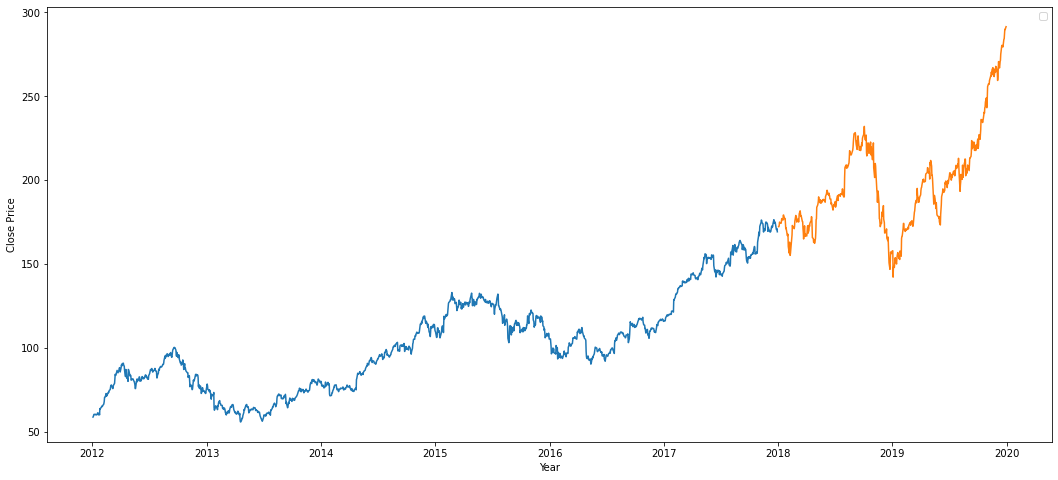

In [97]:
plt.plot(train)
plt.plot(test)
plt.legend()
plt.xlabel("Year")
plt.ylabel('Close Price')
plt.show()

In [51]:
# Figure out order for ARIMA Model
from pmdarima import auto_arima

In [52]:
stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5589.490, Time=5.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5591.585, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5592.740, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5592.676, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5592.981, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5594.532, Time=1.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5594.385, Time=1.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5594.068, Time=3.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5594.046, Time=4.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5594.158, Time=0.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5595.597, Time=1.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5595.633, Time=1.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5595.542, Time=4.58 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5590.956, Time=2.18 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1509
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2788.745
Date:                Thu, 08 Dec 2022   AIC                           5589.490
Time:                        14:54:48   BIC                           5621.401
Sample:                             0   HQIC                          5601.374
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1062      0.057      1.864      0.062      -0.005       0.218
ar.L1          0.5405      0.019     28.530      0.000       0.503       0.578
ar.L2         -0.9796      0.018    -53.649      0.000      -1.015      -0.944
ma.L1         -0.5449      0.024    -22.569      0.000      -0.592      -0.498
ma.L2          0.9648      0.023     41.131      0.000       0.919       1.011
sigma2         2.3655      0.052     45.101      0.000       2.263       2.468
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):               845.01
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### (1,1,1)

In [92]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['Close'],order = (1,1,1))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1509
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2794.704
Date:                Thu, 08 Dec 2022   AIC                           5595.408
Time:                        14:57:01   BIC                           5611.363
Sample:                             0   HQIC                          5601.350
                               - 1509                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3193      0.655     -0.487      0.626      -1.604       0.965
ma.L1          0.3500      0.650      0.539      0.590      -0.924       1.624
sigma2         2.3836      0.052     46.165      0.000       2.282       2.485
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               866.63
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+501,type='levels'))
test_pred.index = test.index
test_pred

,predicted_mean
Date,
2018-01-02,169.174040
2018-01-03,169.191910
2018-01-04,169.186203
2018-01-05,169.188026
2018-01-08,169.187444
...,...
2019-12-23,169.187585
2019-12-24,169.187585
2019-12-26,169.187585


In [94]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1]   # To print ouput in date format
print(test_pred)

            predicted_mean
Date                      
2018-01-02      169.174040
2018-01-03      169.191910
2018-01-04      169.186203
2018-01-05      169.188026
2018-01-08      169.187444
...                    ...
2019-12-23      169.187585
2019-12-24      169.187585
2019-12-26      169.187585
2019-12-27      169.187585
2019-12-30      169.187585

[502 rows x 1 columns]


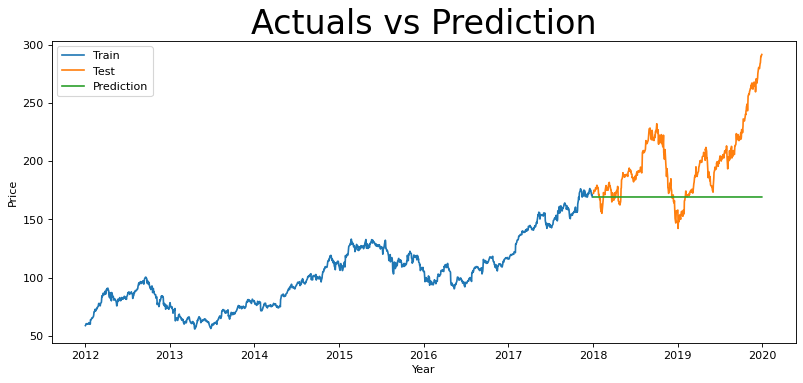

In [95]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction', size=30)
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [58]:
mse = mean_squared_error(test_pred['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1740.4881488757117
Root Mean Squared Error (RMSE) =  41.72
Mean Absolute Error (MAE)  =  31.589540371585755
Mean Absolute Percentage Error (MAPE)  =  0.18671560818199653


**RMSE : It measures the average magnitude of the errors and is concerned with the deviations from the actual value. RMSE value with zero indicates that the model has a perfect fit. The lower the RMSE, the better the model and its predictions.**
#### Mean absolute error: 
**It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset. Mathematically speaking, it is the arithmetic average of absolute errors. MAE measures only the magnitude of the errors and doesn’t concern itself with their direction. The lower the MAE, the higher the accuracy of a model.**

### Forecast for 30 Days

In [59]:
forecast = result.predict(len(df), len(df)+31, type = 'levels')
forecast
index_future_dates = pd.date_range(start='2019-12-30', end = '2020-01-30')
forecast.index=index_future_dates
print(forecast)

2019-12-30    169.185383
2019-12-31    169.185383
2020-01-01    169.185383
2020-01-02    169.185383
2020-01-03    169.185383
2020-01-04    169.185383
2020-01-05    169.185383
2020-01-06    169.185383
2020-01-07    169.185383
2020-01-08    169.185383
2020-01-09    169.185383
2020-01-10    169.185383
2020-01-11    169.185383
2020-01-12    169.185383
2020-01-13    169.185383
2020-01-14    169.185383
2020-01-15    169.185383
2020-01-16    169.185383
2020-01-17    169.185383
2020-01-18    169.185383
2020-01-19    169.185383
2020-01-20    169.185383
2020-01-21    169.185383
2020-01-22    169.185383
2020-01-23    169.185383
2020-01-24    169.185383
2020-01-25    169.185383
2020-01-26    169.185383
2020-01-27    169.185383
2020-01-28    169.185383
2020-01-29    169.185383
2020-01-30    169.185383
Freq: D, Name: predicted_mean, dtype: float64


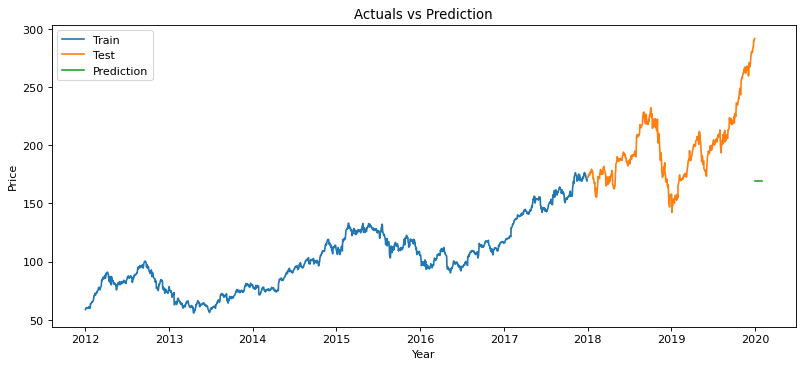

In [60]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Actuals vs Prediction')
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

<AxesSubplot:>

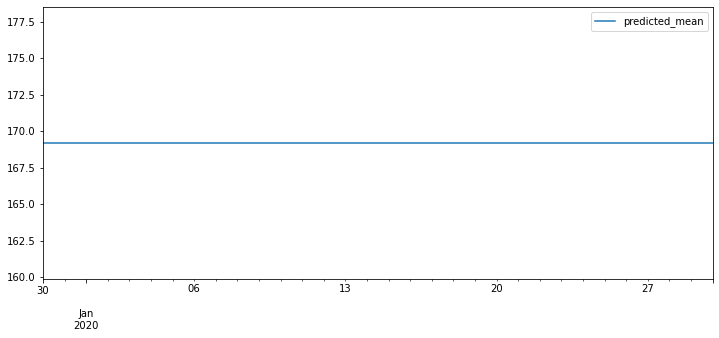

In [61]:
forecast.plot(figsize=(12,5), legend=True)

### SARIMA

In [62]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 22) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 22)
SARIMAX: (0, 1, 1) x (0, 1, 2, 22)
SARIMAX: (0, 1, 2) x (1, 1, 0, 22)
SARIMAX: (0, 1, 2) x (1, 1, 1, 22)


In [102]:
model_SA = sm.tsa.SARIMAX(train['Close'], order=(0,1,2), seasonal_order=(1,1,0,66))
result_SA = model_SA.fit()
result_SA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Close   No. Observations:                 1509
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 66)   Log Likelihood               -3016.116
Date:                             Thu, 08 Dec 2022   AIC                           6040.232
Time:                                     15:01:10   BIC                           6061.327
Sample:                                          0   HQIC                          6048.106
                                            - 1509                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0037      0.023      0.160      0.873      -0.042       0.049
ma.L2         -0.0329      0.025     -1.307      0.191      -0.082       0.016
ar.S.L66      -0.4966      0.018    -28.337      0.000      -0.531      -0.462
sigma2         3.7901      0.090     42.147      0.000       3.614       3.966
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               548.63
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+501,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

,predicted_mean
Date,
2018-01-02,170.072161
2018-01-03,169.463860
2018-01-04,168.848892
2018-01-05,169.735641
2018-01-08,169.005296
...,...
2019-12-23,276.735602
2019-12-24,278.666345
2019-12-26,277.815519


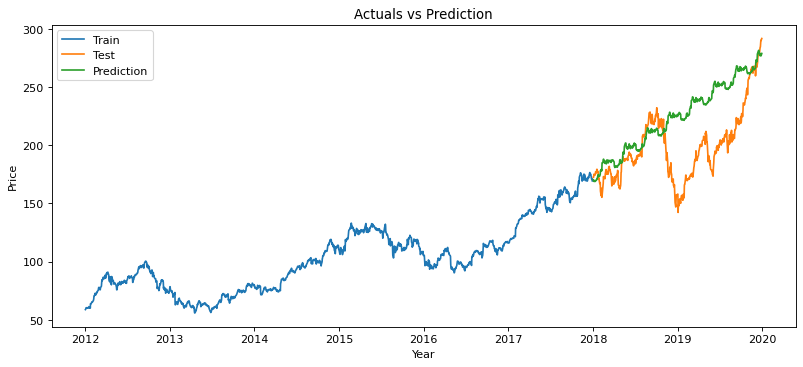

In [104]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [105]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['Close'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.Close)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  1326.4440151982483
Root Mean Squared Error (RMSE) =  36.42
Mean Absolute Error (MAE)  =  28.508334444664385
Mean Absolute Percentage Error (MAPE)  =  0.12270984381154762


### Forecast for next 30 days

In [67]:
forecast_SA = result_SA.predict(len(df), len(df)+31, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2019-12-30', end = '2020-01-30')
forecast_SA.index=index_future_dates
print(forecast_SA)

2019-12-30    276.560818
2019-12-31    275.632057
2020-01-01    275.159639
2020-01-02    275.880578
2020-01-03    274.761772
2020-01-04    276.508979
2020-01-05    276.753803
2020-01-06    277.269805
2020-01-07    277.381653
2020-01-08    278.508465
2020-01-09    278.587316
2020-01-10    279.414921
2020-01-11    281.486031
2020-01-12    282.196964
2020-01-13    281.497330
2020-01-14    278.999220
2020-01-15    279.804781
2020-01-16    279.977013
2020-01-17    280.834453
2020-01-18    279.380847
2020-01-19    279.669070
2020-01-20    283.094267
2020-01-21    285.952288
2020-01-22    289.920433
2020-01-23    287.970836
2020-01-24    289.052627
2020-01-25    292.761946
2020-01-26    294.346095
2020-01-27    295.051215
2020-01-28    294.003815
2020-01-29    294.514533
2020-01-30    294.541505
Freq: D, Name: predicted_mean, dtype: float64


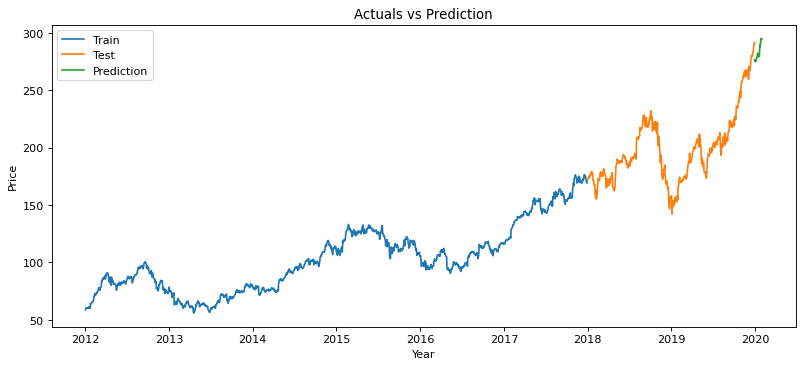

In [68]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label='Test')
plt.plot(forecast_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

### Holt Method

In [69]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [70]:
'''Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.
#### Set the value of Alpha and define m (Time Period)'''
m = 22
alpha = 1/(2*m)

Text(0, 0.5, 'Price')

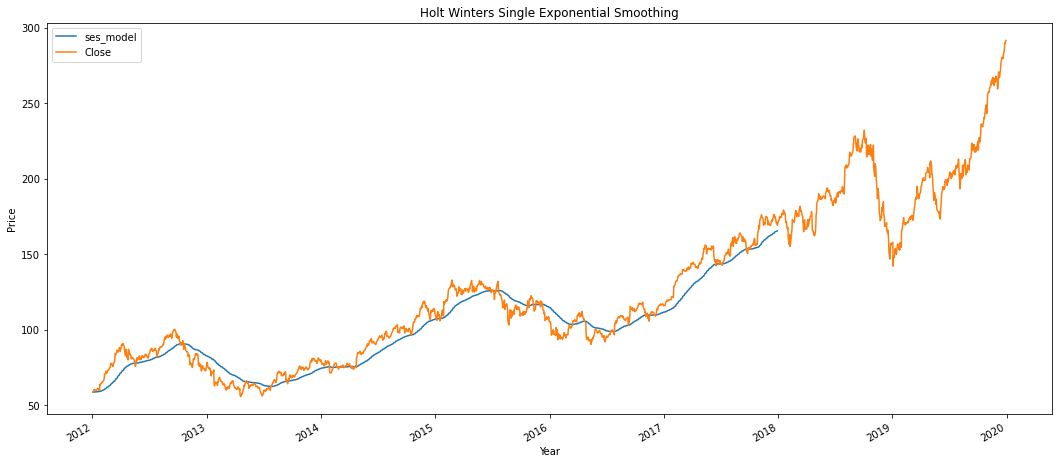

In [71]:
# Single/Simple Exponential Method
df['ses_model'] = SimpleExpSmoothing(train["Close"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
df[['ses_model','Close']].plot(title='Holt Winters Single Exponential Smoothing', legend=True)
plt.xlabel("Year")
plt.ylabel('Price')
# df2['ses_model']

As expected, it didn’t fit quite well, and rightfully so, because if we remember, Single ES doesn’t work for data with Trends and Seasonality.
#### Double HWES
So, we’d fit the data on Double ES, on both Additive and Multiplicative Trend,

Text(0, 0.5, 'Price')

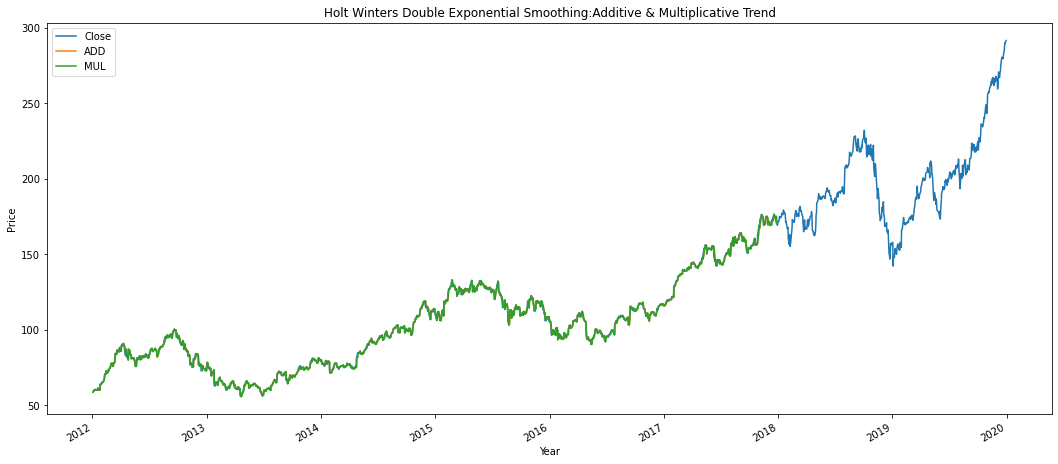

In [72]:
df['ADD'] = ExponentialSmoothing(train['Close'],trend='add').fit().fittedvalues
df['MUL'] = ExponentialSmoothing(train['Close'],trend='mul').fit().fittedvalues
df[['Close','ADD','MUL']].plot(title='Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend')
plt.xlabel("Year")
plt.ylabel('Price')

This looks promising! Here we have plotted for both Additive and Multiplicative Seasonality.

#### Forecasting with Holt-Winters Exponential Smoothing (Triple ES) : 
Let’s try and forecast sequences, let us start by dividing the dataset into Train and Test Set. We have taken 1509 data points as Train set and the last 502 data points as Test Set.

In [73]:
# Fit the model tend='mul', season='mul'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=22).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    169.363654
2018-01-03    169.619309
2018-01-04    169.811525
2018-01-05    169.665298
2018-01-08    169.959899
                 ...    
2019-12-23    232.165880
2019-12-24    232.899654
2019-12-26    232.467419
2019-12-27    232.226390
2019-12-30    232.275244
Length: 502, dtype: float64


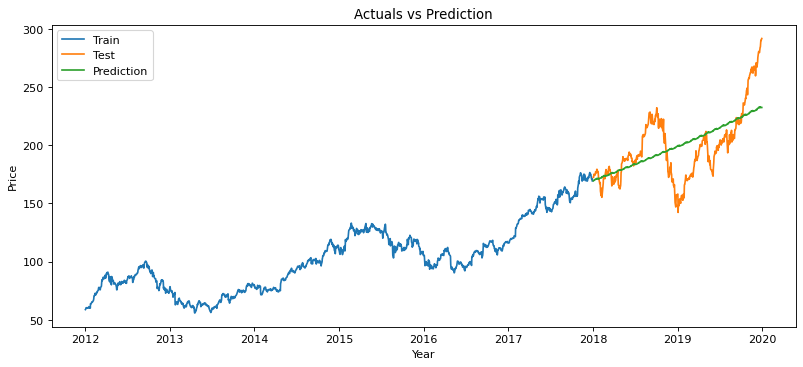

In [74]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [75]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  524.6797431966899
Root Mean Squared Error (RMSE) =  22.91
Mean Absolute Error (MAE)  =  18.198253817833002
Mean Absolute Percentage Error (MAPE)  =  0.09247608468006932


In [76]:
# Fit the model tend='add', season='mul'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=22).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    169.330470
2018-01-03    169.551551
2018-01-04    169.709459
2018-01-05    169.528686
2018-01-08    169.788545
                 ...    
2019-12-23    206.151151
2019-12-24    206.745343
2019-12-26    206.304747
2019-12-27    206.033670
2019-12-30    206.020603
Length: 502, dtype: float64


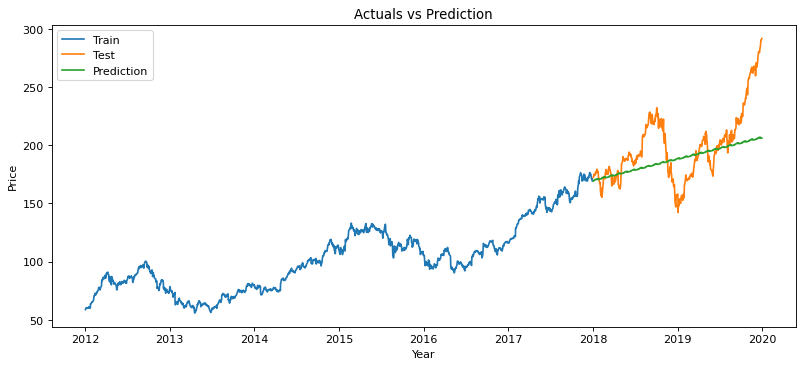

In [77]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [78]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  709.4321924266758
Root Mean Squared Error (RMSE) =  26.64
Mean Absolute Error (MAE)  =  19.630914728028912
Mean Absolute Percentage Error (MAPE)  =  0.09346277106290433


In [79]:
# Fit the model tend='mul', season='add'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='add',seasonal_periods=22).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    169.337421
2018-01-03    169.484361
2018-01-04    169.629631
2018-01-05    169.585820
2018-01-08    169.780738
                 ...    
2019-12-23    231.685466
2019-12-24    232.068742
2019-12-26    231.937151
2019-12-27    232.030786
2019-12-30    232.146861
Length: 502, dtype: float64


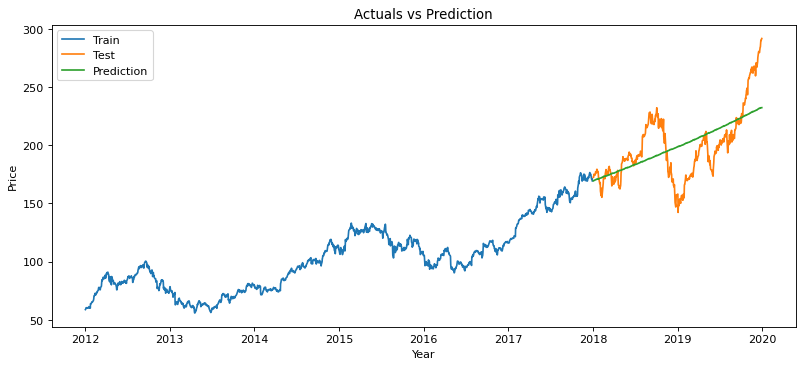

In [80]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [81]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  524.3351835288169
Root Mean Squared Error (RMSE) =  22.9
Mean Absolute Error (MAE)  =  18.166766719962617
Mean Absolute Percentage Error (MAPE)  =  0.09216885704041969


In [82]:
# Fit the model tend='add', season='add'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=22).fit()
test_predictions = fitted_model.forecast(502)
test_predictions.index = df['Close'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

Date
2018-01-02    169.303952
2018-01-03    169.417310
2018-01-04    169.529074
2018-01-05    169.451758
2018-01-08    169.613094
                 ...    
2019-12-23    205.881414
2019-12-24    206.192141
2019-12-26    205.987923
2019-12-27    206.008770
2019-12-30    206.052177
Length: 502, dtype: float64


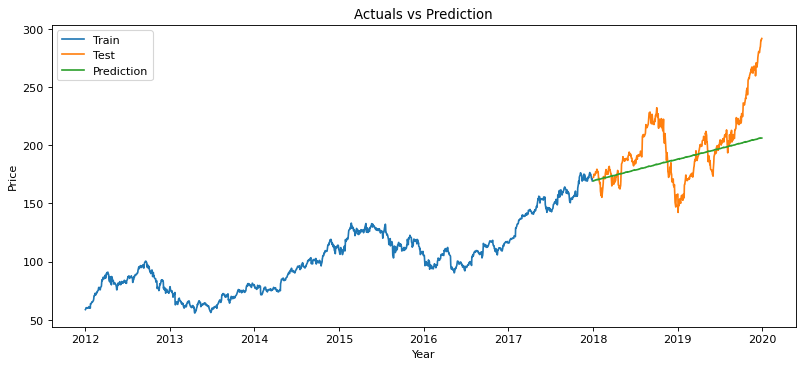

In [83]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [84]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  715.3757094035349
Root Mean Squared Error (RMSE) =  26.75
Mean Absolute Error (MAE)  =  19.730292183041726
Mean Absolute Percentage Error (MAPE)  =  0.09385248093866952


### EMA

In [85]:
df['EMA'] = train['Close'].ewm(span=22).mean()

In [86]:
df['EMA']

Date
2012-01-03    58.750000
2012-01-04    58.912045
2012-01-05    59.206201
2012-01-06    59.529419
2012-01-09    59.700871
                ...    
2019-12-23          NaN
2019-12-24          NaN
2019-12-26          NaN
2019-12-27          NaN
2019-12-30          NaN
Name: EMA, Length: 2011, dtype: float64

In [87]:
df['EMA_t'] = test['Close'].ewm(span=22).mean()

In [88]:
df['EMA_t']

Date
2012-01-03           NaN
2012-01-04           NaN
2012-01-05           NaN
2012-01-06           NaN
2012-01-09           NaN
                 ...    
2019-12-23    271.561176
2019-12-24    272.666291
2019-12-26    274.165744
2019-12-27    275.525244
2019-12-30    276.916093
Name: EMA_t, Length: 2011, dtype: float64

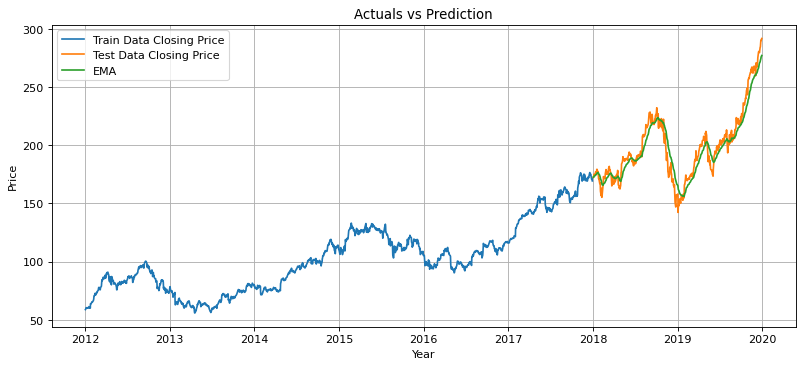

In [89]:
plt.figure(figsize=(12,5), dpi=80)
plt.grid(True)
plt.plot(train['Close'],label='Train Data Closing Price')
plt.plot(test['Close'],label='Test Data Closing Price')
plt.plot(df['EMA_t'],label='EMA')
plt.title('Actuals vs Prediction')
plt.xlabel("Year")
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize=10)
plt.legend(loc=2)

In [90]:
df['EMA_t'].dropna()

Date
2018-01-02    172.260000
2018-01-03    172.244318
2018-01-04    172.530365
2018-01-05    173.234396
2018-01-08    173.499838
                 ...    
2019-12-23    271.561176
2019-12-24    272.666291
2019-12-26    274.165744
2019-12-27    275.525244
2019-12-30    276.916093
Name: EMA_t, Length: 502, dtype: float64

+ So as you can observe from the graph above, that the Exponential Moving Average (EMA) does a superb job in capturing the pattern of the data while the Cumulative Moving Average (CMA) lacks by a considerable margin.

In [91]:
mse = mean_squared_error(test['Close'],df['EMA_t'].dropna())
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test['Close'],df['EMA_t'].dropna())
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test['Close'],df['EMA_t'].dropna())
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  67.73740420180313
Root Mean Squared Error (RMSE) =  8.23
Mean Absolute Error (MAE)  =  6.784732952522413
Mean Absolute Percentage Error (MAPE)  =  0.03456359719628176
